# Atomic orbital/Molecular orbital ?

In this tutorial, we will highlight the fuzzy nature of the distinctions between atomic and molecular orbitals, using the 'dashboard' function of the plotting submodule.

To do so, we will simulate a simple dimer, made of two identical circular pillars. We will set as parameter the inter-distance and look how the $p_x$ orbital of the single pillar gradualy morphs into the antibonding mode of the dimer. 

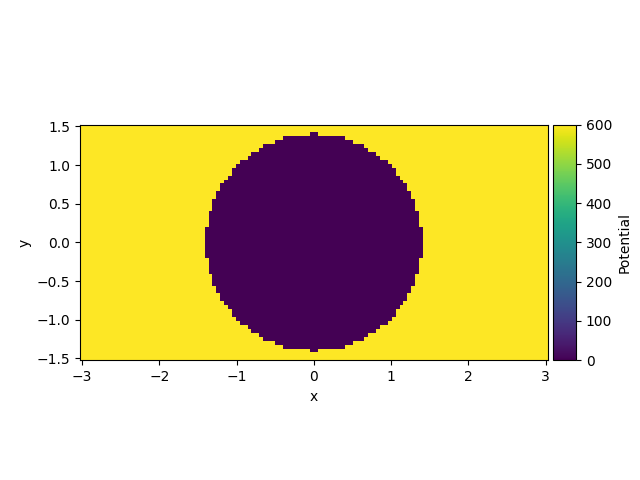

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bloch_schrodinger.potential import Potential, create_parameter
from bloch_schrodinger.fdsolver import FDSolver


a1 = [6,0]
a2 = [0,3]

# --- Initialize the potential --- 
dimer = Potential(
    unitvecs=[a1,a2],
    resolution = (120,60), 
    v0 = 600,
    endpoint=True
)

# --- Setting up the parameters --- 
radius = 1.4
inter = create_parameter('inter-distance', np.linspace(0, 1.5, 31))

# --- Creating the dimer ---
dimer.circle(
    center = (-inter, 0),
    radius = radius
)

dimer.circle(
    center = (inter, 0),
    radius = radius
)

%matplotlib widget
dimer.plot()
plt.show()

In [2]:
# --- Solving for a singlle field, we'll look at the 6 first orbitals (all s and p orbitals)
solv = FDSolver(
    potentials = [dimer],
    alphas = [1]
)

eigva, eigve = solv.solve(
    n_eigva=6, # Let's look at the s and p modes
    parallel=True
)

Performing 31 diagonalizations...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  31 | elapsed:    7.4s remaining:   31.0s
[Parallel(n_jobs=-1)]: Done  13 out of  31 | elapsed:    8.5s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  20 out of  31 | elapsed:   10.2s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  27 out of  31 | elapsed:   10.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   10.8s finished


storing the results


100%|██████████| 31/31 [00:00<00:00, 541.13it/s]


Now, let's plot the eigenvalues as a function of the inter-distance, as wee as the eigenvectors. To do that, we can us ethe dashboard function.

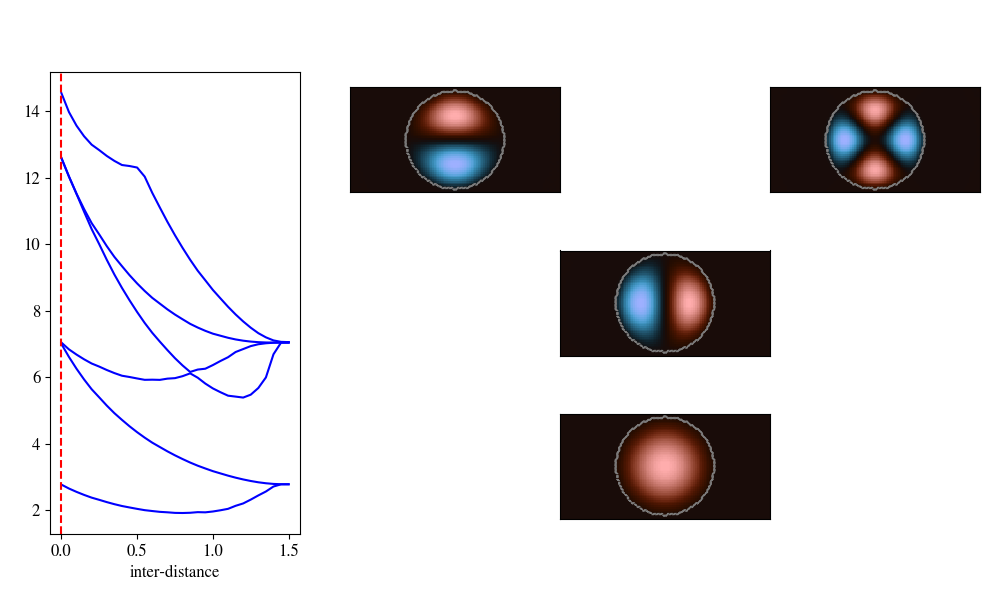

In [3]:
from bloch_schrodinger.plotting import dashboard

# Creating a matrix representing the plot structure. The figure will consist of a panel showing the eigenvalues, 
# and beside it an array of pcolormeshes with the structure specified by this matrix.
plot_matrix = [
    [eigve.sel(band=2).real, None, eigve.sel(band=3).real], # Plots can be left empty by using 'None', but the matrix must be rectangular
    [None, eigve.sel(band=1).real, None],
    [None, eigve.sel(band=0).real, None]
]

# The dashboard function
dashboard(
    eigva       = eigva,                         
    eigvadim    = 'inter-distance',     # The dimension to plot the eigenvalues against
    eigveplots  = plot_matrix,          # The plot matrix.
    potential   = dimer,                # The potential for the contour overlay, only one needs to be given.
    template    = 'real',               # A template to use for the colormesh, see doc of 'plot_eigenvector' and 'get_template' for more infos.
    titles      = None,                 # The titles, either a matrix with the same shape as plot_matrix, or None.
    eigvawidth  = 0.3,                  # The fraction of the plot taken by the eigenvalue structure
    spines      = True,                 # Whether to show the box around each pcolormesh 
    gskw        = {"wspace":0}          # Additionnal keywords my be given to the gridspec handling the plots. see matplotlib doc for more infos.
)
plt.show()